# Project Title - Predicting Diabetes disease at an early stage.

# For predicting the Diseases Apply Diffrent Models

# 1 Logostic Regression
# 2 KNeighbors classification
# 3 Support Vector Machine 
# 4 KNeighborsClassifier
# 5GaussianNB
# 6RandomForestClassifier
# 7GradientBoostingClassifier
# 8BaggingClassifier

# Load the require Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the dataset

df=pd.read_csv('diabetes.csv')

In [3]:
# for checking the dataset we use this command
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# this command used for checking the data is balanced or not
count=pd.value_counts(df['Outcome'])
print(count)

0    500
1    268
Name: Outcome, dtype: int64


In [5]:
# it describe of all the info about dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

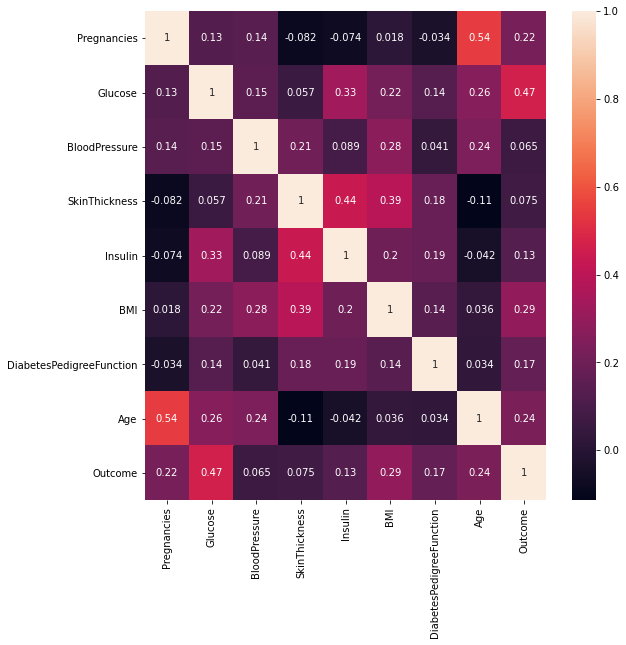

In [7]:
# by seeing this diagram we can analyze the relation between columns
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

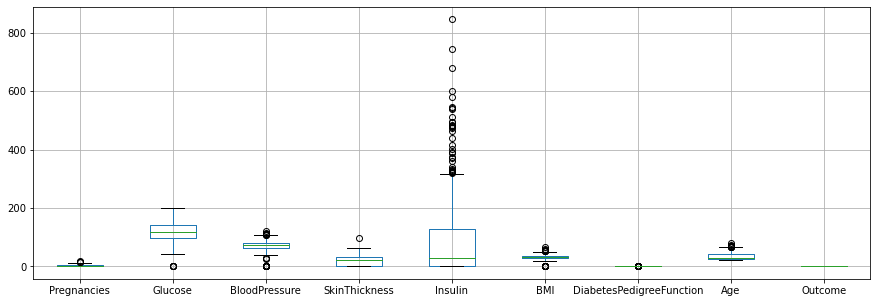

In [8]:
plt.figure(figsize=(15,5))
df.boxplot()

In [9]:
# this command is used for checking any na values is avilable in dataset or not 

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# this command use for checking the all columns of dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The accuracy of Logistic Regressin is: 0.7760416666666666

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       118
           1       0.82      0.54      0.65        74

    accuracy                           0.78       192
   macro avg       0.79      0.73      0.74       192
weighted avg       0.78      0.78      0.76       192



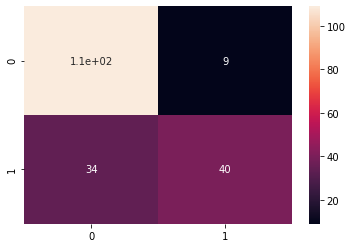

In [11]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
model_logistic=LogisticRegression()
model_logistic.fit(xtrain,ytrain)
ypred=model_logistic.predict(xtest)
accuracy_Logistic=accuracy_score(ytest,ypred)
print('The accuracy of Logistic Regressin is:',accuracy_Logistic)
print()
cm_Logistic=confusion_matrix(ytest,ypred)
sns.heatmap(cm_Logistic,annot=True)
cr_Logistic = classification_report(ytest,ypred)
print(cr_Logistic)

# Decision Tree model

The accuracy of Decision tree model is: 0.7447916666666666

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       118
           1       0.68      0.64      0.66        74

    accuracy                           0.74       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.74      0.74      0.74       192



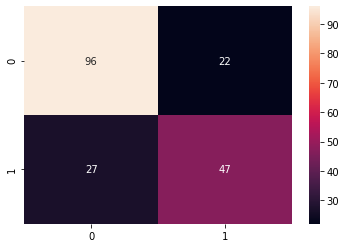

In [12]:
model_Decision=DecisionTreeClassifier()
model_Decision.fit(xtrain,ytrain)
ypred=model_Decision.predict(xtest)
accuracy_Decision=accuracy_score(ytest,ypred)
print('The accuracy of Decision tree model is:',accuracy_Decision)
print()
cm_Logistic=confusion_matrix(ytest,ypred)
sns.heatmap(cm_Logistic,annot=True)
cr_Logistic = classification_report(ytest,ypred)
print(cr_Logistic)

The accuracy support vector machine model is: 0.7922077922077922

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



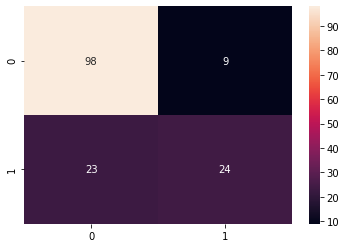

In [13]:
# c is penalty parameter which is used to define the margin low value - low margin and vice vers
model=SVC(C=0.1,kernel='linear',decision_function_shape='ovr',probability=True)
model=SVC()
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
acc_svm=accuracy_score(ytest,ypred)
print('The accuracy support vector machine model is:',acc_svm)
print()
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
cr_svm=classification_report(ytest,ypred)
print(cr_svm)

The accuracy of KNN is: 0.7922077922077922

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



<AxesSubplot:>

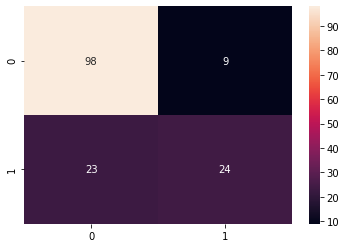

In [14]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(xtrain,ytrain)
ypred=model.predict(xtest)
acc_knn=accuracy_score(ytest,ypred)
print('The accuracy of KNN is:',acc_knn)
print()
cr_knn=classification_report(ytest,ypred)
print(cr_knn)
cm_knn=confusion_matrix(ytest,ypred)
sns.heatmap(cm_knn,annot=True)


The accuracy of GaussianNB is: 0.7922077922077922

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



<AxesSubplot:>

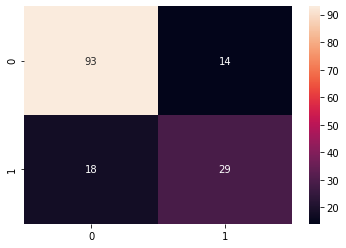

In [15]:

model_gnb =GaussianNB()
model_gnb.fit(xtrain,ytrain)
ypred=model_gnb.predict(xtest)
acc_gnb=accuracy_score(ytest,ypred)
print('The accuracy of GaussianNB is:',acc_gnb)
print()
cr_gnb=classification_report(ytest,ypred)
print(cr_gnb)
cm_gnb=confusion_matrix(ytest,ypred)
sns.heatmap(cm_gnb,annot=True)


The accuracy of Random Forest Model is: 0.8116883116883117

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



<AxesSubplot:>

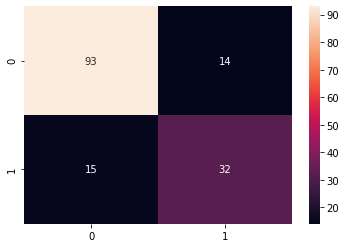

In [16]:
model_rfc=RandomForestClassifier()
model_rfc.fit(xtrain,ytrain)
ypred=model_rfc.predict(xtest)
acc_rfc=accuracy_score(ytest,ypred)
print('The accuracy of Random Forest Model is:',acc_rfc)
print()
cr_rfc=classification_report(ytest,ypred)
print(cr_rfc)
cm_rfc=confusion_matrix(ytest,ypred)
sns.heatmap(cm_rfc,annot=True)

The accuracy of Gradient Bossting Model is: 0.8181818181818182

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



<AxesSubplot:>

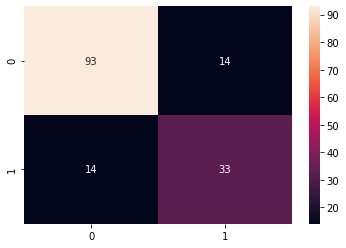

In [17]:
model_gbc=GradientBoostingClassifier(n_estimators=100,learning_rate =0.1,criterion='mse',max_depth=3)
model_gbc.fit(xtrain,ytrain)
ypred=model_gbc.predict(xtest)
acc_gbc=accuracy_score(ytest,ypred)
print('The accuracy of Gradient Bossting Model is:',acc_gbc)
print()
cr_gbc=classification_report(ytest,ypred)
print(cr_gbc)
cm_gbc=confusion_matrix(ytest,ypred)
sns.heatmap(cm_gbc,annot=True)

The accuracy of Bagging Classifier is : 0.8051948051948052

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



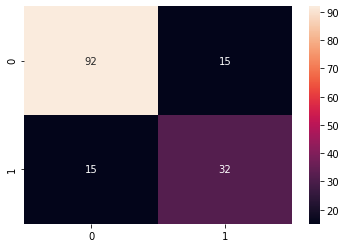

In [18]:
#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier
#making the bagging classifier with 100 decision trees
model_bc=BaggingClassifier(n_estimators=100)
#fitting data to bagging model
model_bc.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model_bc.predict(xtest)
#Model Evaluation 
acc_bc=accuracy_score(ytest,ypred)
print("The accuracy of Bagging Classifier is :",acc_bc)
print()
cm_bc=confusion_matrix(ytest,ypred)
sns.heatmap(cm_bc,annot=True)
print(classification_report(ytest,ypred))

# HyperParameter Tuning Model Using diffrent Classification model

In [19]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svm=SVC(C=0.1)
knn=KNeighborsClassifier(n_neighbors=5)
GNB=GaussianNB()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
bc=BaggingClassifier()
xgb=XGBClassifier()
models={"Logistic Regression":lr,'Decision tree classifier':dtc,'Random Forest Classifier':rfc,'Gradient boost classifier':gbc,
        'Bagging classifier':bc,"KNeighborsClassifier":knn,"Support vector machine":svm,"GaussianNB":GNB}

In [20]:
accuracy=[]
for name,model in models.items():
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    accuracy.append(acc)
    print("For ",name," ,The Accuracy is :",acc)

For  Logistic Regression  ,The Accuracy is : 0.8246753246753247
For  Decision tree classifier  ,The Accuracy is : 0.8051948051948052
For  Random Forest Classifier  ,The Accuracy is : 0.8116883116883117
For  Gradient boost classifier  ,The Accuracy is : 0.8051948051948052
For  Bagging classifier  ,The Accuracy is : 0.7792207792207793
For  KNeighborsClassifier  ,The Accuracy is : 0.7532467532467533
For  Support vector machine  ,The Accuracy is : 0.7597402597402597
For  GaussianNB  ,The Accuracy is : 0.7922077922077922


<AxesSubplot:ylabel='Count'>

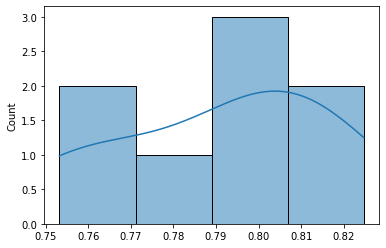

In [21]:
sns.histplot(accuracy,kde=True) 

Text(0, 0.5, 'Accuracy')

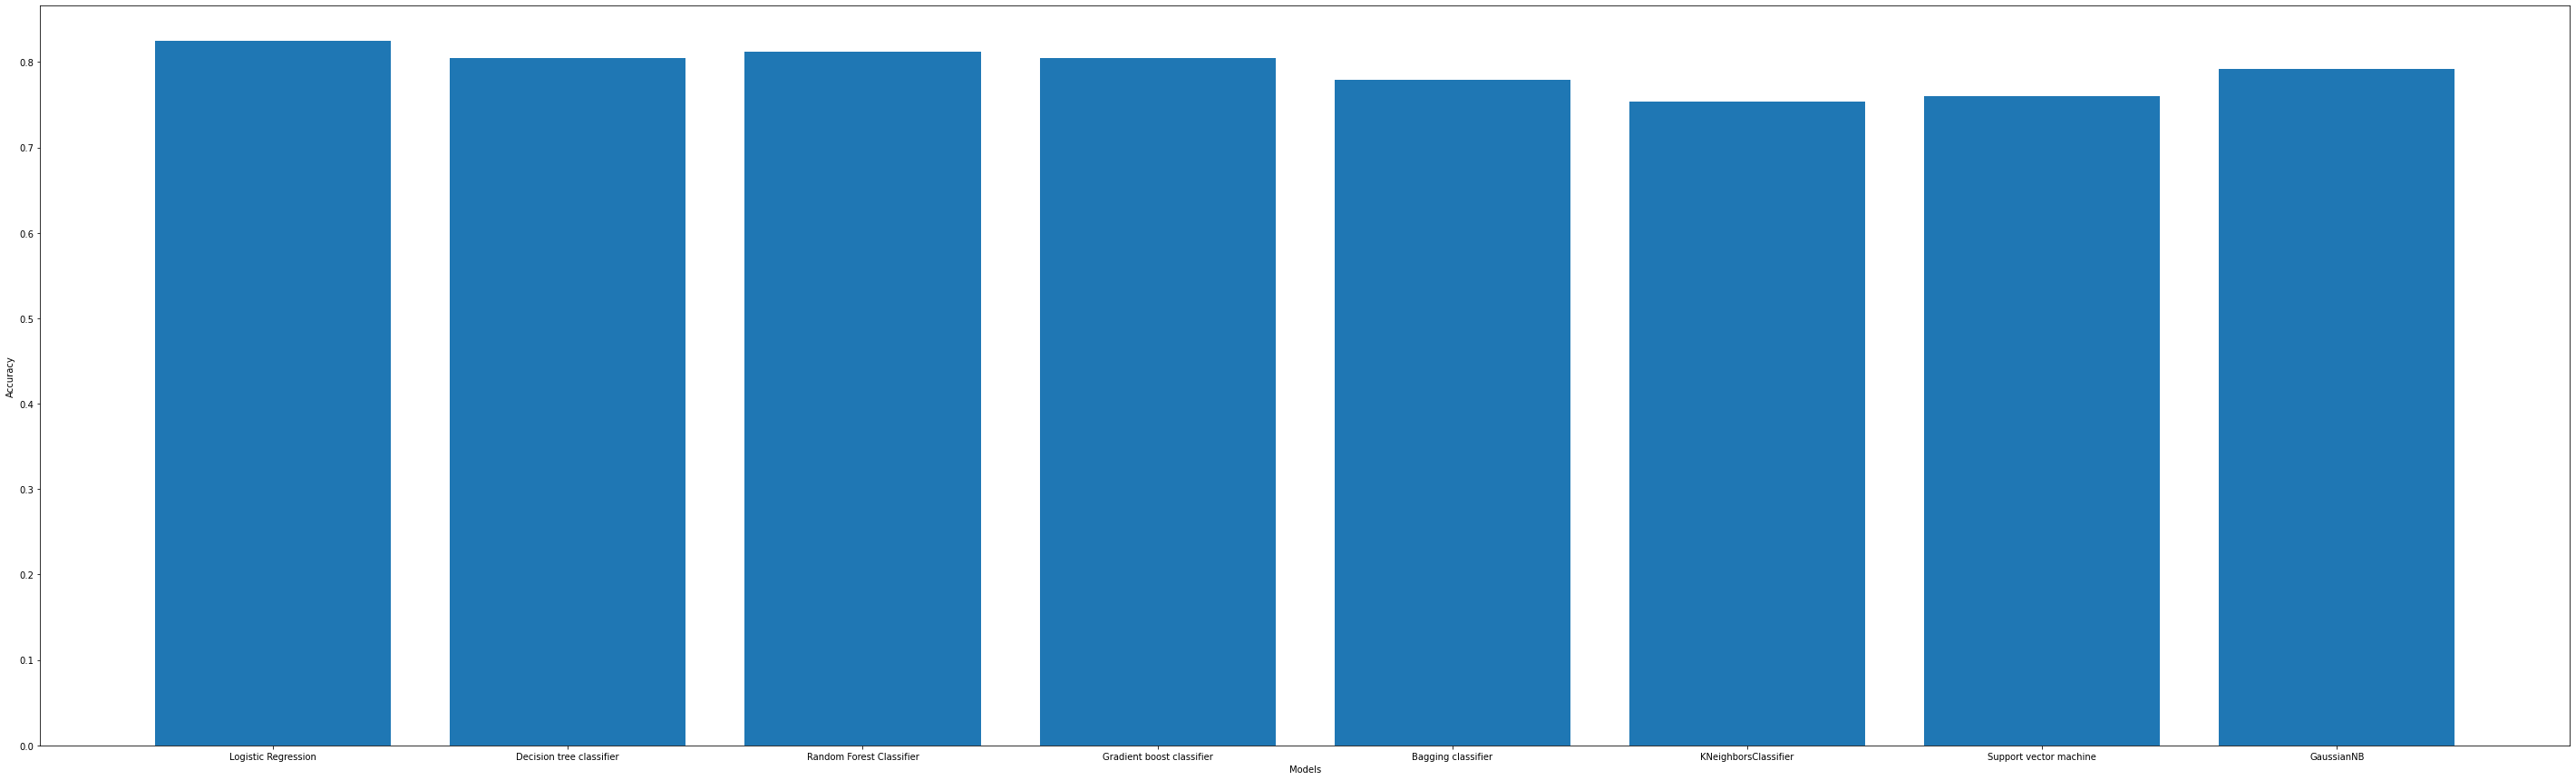

In [22]:
plt.figure(figsize=(50,15))
plt.bar(models.keys(),accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")


No handles with labels found to put in legend.


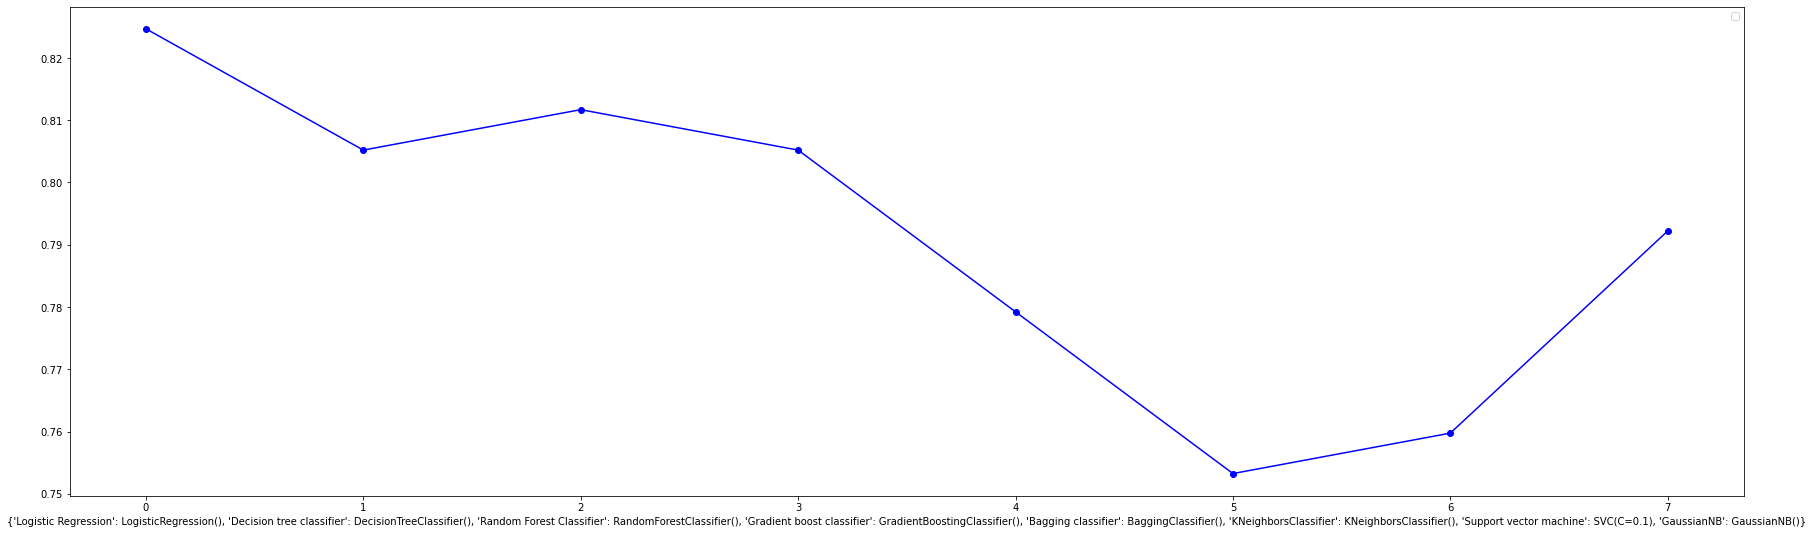

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,9))
plt.plot(accuracy,'b-o')
plt.xlabel(models)
plt.legend()

# Here we can analyse the model and we got diffrent accuracy on diffrent models and we can say the logistic Regression is the best model for Diabetes Dataset
    